In [10]:
import pandas as pd 
import numpy as np
import calendar
import missingno as msno
import datetime as dt
import matplotlib.pyplot as plt
import warnings
import seaborn as sn

In [11]:
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [21]:
data = pd.read_csv('C:\\Users\\E\\Documents\\practise_data\\hour.csv', sep=',')
print(data.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [23]:
seasonmap = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weathermap = {1: 'Clear + Few clouds + Party cloudy + Fully cloudy' ,\
             2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',\
             3: 'Light snow, light rain + Thunderstorm + Scattered clouds, light rain + scattered clouds',\
             4: 'Heavy rain + Ice pallets + Thunderstorm + Mist, Snow + fog'}
data['date'] = data.dteday.apply(lambda x: x.split()[0])
data['weekday'] = data.date.apply(lambda dateString: calendar.day_name[dt.datetime.strptime(dateString, '%Y-%m-%d').weekday()])
data['season'] = data.season.map(seasonmap)
data['weather'] = data.weathersit.map(weathermap)

In [34]:
#converting to categorical
categoryVariableList =['hr', 'weekday', 'mnth', 'season', 'weather', 'holiday', 'workingday']
for var in categoryVariableList:
    data[var] = data[var].astype('category')
    


In [26]:
#detecting missing values
data.isnull().sum().sum()

0

[Text(0,0.5,'count'),
 Text(0.5,0,'working day'),
 Text(0.5,1,'Count daily distribution')]

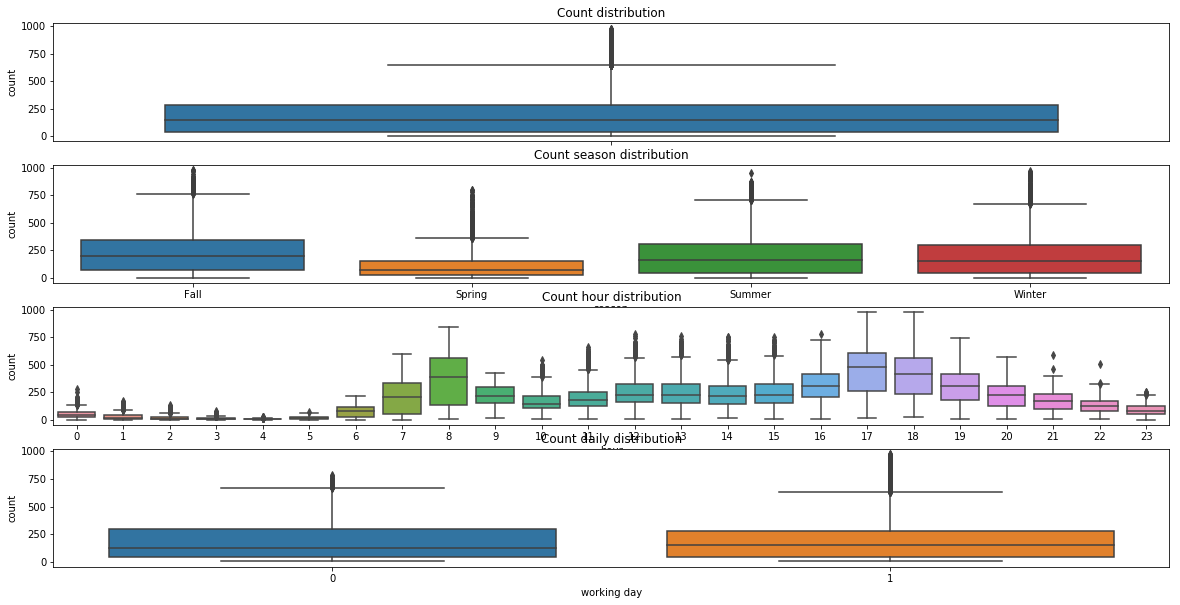

In [28]:
#outlier detection
fig, ax = plt.subplots(nrows= 4, ncols= 1)
fig.set_size_inches(20, 10)
sn.boxplot(data=data, y='cnt', orient='v', ax= ax[0])
sn.boxplot(data=data, y='cnt', x='season', orient='v', ax= ax[1])
sn.boxplot(data=data, y='cnt', x='hr', orient='v', ax= ax[2])
sn.boxplot(data=data, y='cnt', x='workingday', orient='v', ax= ax[3])

ax[0].set(ylabel='count', title='Count distribution')
ax[1].set(xlabel='season', ylabel='count', title='Count season distribution')
ax[2].set(xlabel='hour', ylabel='count', title='Count hour distribution')
ax[3].set(xlabel='working day', ylabel='count', title='Count daily distribution')

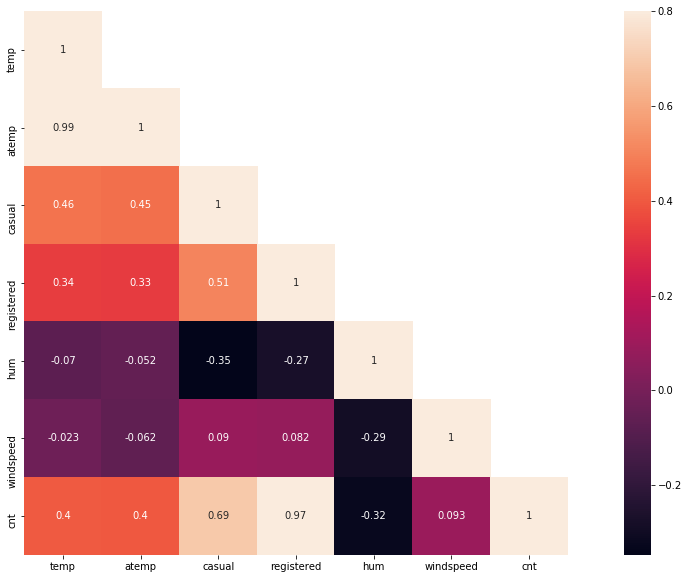

In [30]:
# correlation analysis
corrMat = data[['temp', 'atemp', 'casual', 'registered', 'hum', 'windspeed', 'cnt']].corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)]= False
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sn.heatmap(corrMat, mask= mask, vmax=.8, square= True, annot=True)

In [31]:
data

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date,weather
0,1,Spring,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01,Clear + Few clouds + Party cloudy + Fully cloudy
1,2,Spring,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01,Clear + Few clouds + Party cloudy + Fully cloudy
2,3,Spring,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01,Clear + Few clouds + Party cloudy + Fully cloudy
3,4,Spring,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01,Clear + Few clouds + Party cloudy + Fully cloudy
4,5,Spring,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01,Clear + Few clouds + Party cloudy + Fully cloudy
5,6,Spring,0,1,5,0,Saturday,0,2,0.24,0.2576,0.75,0.0896,0,1,1,2011-01-01,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
6,7,Spring,0,1,6,0,Saturday,0,1,0.22,0.2727,0.80,0.0000,2,0,2,2011-01-01,Clear + Few clouds + Party cloudy + Fully cloudy
7,8,Spring,0,1,7,0,Saturday,0,1,0.20,0.2576,0.86,0.0000,1,2,3,2011-01-01,Clear + Few clouds + Party cloudy + Fully cloudy
8,9,Spring,0,1,8,0,Saturday,0,1,0.24,0.2879,0.75,0.0000,1,7,8,2011-01-01,Clear + Few clouds + Party cloudy + Fully cloudy
9,10,Spring,0,1,9,0,Saturday,0,1,0.32,0.3485,0.76,0.0000,8,6,14,2011-01-01,Clear + Few clouds + Party cloudy + Fully cloudy
